This script shows our modular APIs for creating bimanual manipulation tasks with two robot arms.

In [1]:
import random
import numpy as np
import robosuite as suite
from robosuite.controllers import load_controller_config

from PIL import Image
from IPython.display import display

In [2]:
from robosuite.utils.transform_utils import *
from transform import *

In [3]:
suite.ALL_ENVIRONMENTS

dict_keys(['Lift', 'Stack', 'NutAssembly', 'NutAssemblySingle', 'NutAssemblySquare', 'NutAssemblyRound', 'PickPlace', 'PickPlaceSingle', 'PickPlaceMilk', 'PickPlaceBread', 'PickPlaceCereal', 'PickPlaceCan', 'Door', 'Wipe', 'TwoArmLift', 'TwoArmPegInHole', 'TwoArmHandoff'])

In [4]:
suite.ALL_CONTROLLERS

dict_keys(['JOINT_VELOCITY', 'JOINT_TORQUE', 'JOINT_POSITION', 'OSC_POSITION', 'OSC_POSE', 'IK_POSE'])

In [5]:
# add a global variable for all robots
suite.ALL_ROBOTS

dict_keys(['Sawyer', 'Baxter', 'Panda', 'Jaco', 'Kinova3', 'IIWA', 'UR5e'])

In [6]:
suite.robots.BIMANUAL_ROBOTS

{'Baxter'}

In [7]:
options = dict()
options["env_name"] = "TwoArmPegInHole"
options["robots"] = [
    random.choice(["Sawyer", "Panda"]),
    random.choice(["Sawyer", "Panda"])
]

options["controller_configs"] = [
    load_controller_config(default_controller="OSC_POSE"),
    load_controller_config(default_controller="OSC_POSE"),
]

options["env_configuration"] = "single-arm-parallel"

In [8]:
options["robots"]

['Panda', 'Panda']

In [9]:
env = suite.make(
    **options,
    has_renderer=False,
    ignore_done=True,
    use_camera_obs=True,
    camera_names="frontview",
)

Creating offscreen glfw


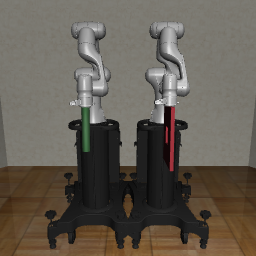

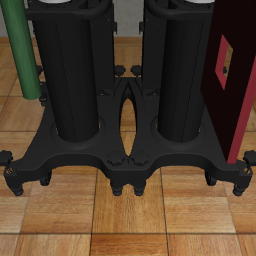

In [10]:
frontview = env.sim.render(height=256, width=256, camera_name="frontview")[::-1]
agentview = env.sim.render(height=256, width=256, camera_name="agentview")[::-1]
display(Image.fromarray(frontview), Image.fromarray(agentview))

In [11]:
for r in env.robots:
    print(r.name)
    print(r.controller.name)
    print(r.controller_config)    
    print(r.controller.qpos_index)
    print(r.controller.qvel_index)
    print(r.controller.joint_index)
    print()

Panda
OSC_POSE
{'type': 'OSC_POSE', 'input_max': 1, 'input_min': -1, 'output_max': [0.05, 0.05, 0.05, 0.5, 0.5, 0.5], 'output_min': [-0.05, -0.05, -0.05, -0.5, -0.5, -0.5], 'kp': 150, 'damping_ratio': 1, 'impedance_mode': 'fixed', 'kp_limits': [0, 300], 'damping_ratio_limits': [0, 10], 'position_limits': None, 'orientation_limits': None, 'uncouple_pos_ori': True, 'control_delta': True, 'interpolation': None, 'ramp_ratio': 0.2, 'robot_name': 'Panda', 'sim': <mujoco_py.cymj.MjSim object at 0x7f8e5cc342f0>, 'eef_name': 'gripper0_grip_site', 'eef_rot_offset': array([ 0.   ,  0.   , -0.383,  0.924], dtype=float32), 'joint_indexes': {'joints': [0, 1, 2, 3, 4, 5, 6], 'qpos': [0, 1, 2, 3, 4, 5, 6], 'qvel': [0, 1, 2, 3, 4, 5, 6]}, 'actuator_range': (array([-80., -80., -80., -80., -80., -12., -12.]), array([80., 80., 80., 80., 80., 12., 12.])), 'policy_freq': 10, 'ndim': 7, 'control_ori': True}
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]

Panda
OSC_POSE
{'type': 'OSC_POSE',

In [12]:
# why MjSim is a class member of robot?
r.sim

In [13]:
env.action_dim

12